In [20]:
from __future__ import print_function
import pickle
import pandas as pd
import numpy as np
from keras.regularizers import L1L2
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import InputLayer
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
np.random.seed(1337)  # for reproducibility
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import get_file
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,
                              f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from google.colab import drive
import json
import h5py
from tensorflow.keras.models import model_from_json


In [ ]:
path = get_file('kddcup.data_10_percent.gz', origin='http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz')

df = pd.read_csv(path, header=None)

df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]


print(df.shape)

df.drop_duplicates(keep='first', inplace = True)
df.dropna(inplace=True,axis=1)


def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


encode_numeric_zscore(df, 'duration')
encode_text_dummy(df, 'protocol_type')
encode_text_dummy(df, 'service')
encode_text_dummy(df, 'flag')
encode_numeric_zscore(df, 'src_bytes')
encode_numeric_zscore(df, 'dst_bytes')
encode_text_dummy(df, 'land')
encode_numeric_zscore(df, 'wrong_fragment')
encode_numeric_zscore(df, 'urgent')
encode_numeric_zscore(df, 'hot')
encode_numeric_zscore(df, 'num_failed_logins')
encode_text_dummy(df, 'logged_in')
encode_numeric_zscore(df, 'num_compromised')
encode_numeric_zscore(df, 'root_shell')
encode_numeric_zscore(df, 'su_attempted')
encode_numeric_zscore(df, 'num_root')
encode_numeric_zscore(df, 'num_file_creations')
encode_numeric_zscore(df, 'num_shells')
encode_numeric_zscore(df, 'num_access_files')
encode_numeric_zscore(df, 'num_outbound_cmds')
encode_text_dummy(df, 'is_host_login')
encode_text_dummy(df, 'is_guest_login')
encode_numeric_zscore(df, 'count')
encode_numeric_zscore(df, 'srv_count')
encode_numeric_zscore(df, 'serror_rate')
encode_numeric_zscore(df, 'srv_serror_rate')
encode_numeric_zscore(df, 'rerror_rate')
encode_numeric_zscore(df, 'srv_rerror_rate')
encode_numeric_zscore(df, 'same_srv_rate')
encode_numeric_zscore(df, 'diff_srv_rate')
encode_numeric_zscore(df, 'srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_count')
encode_numeric_zscore(df, 'dst_host_srv_count')
encode_numeric_zscore(df, 'dst_host_same_srv_rate')
encode_numeric_zscore(df, 'dst_host_diff_srv_rate')
encode_numeric_zscore(df, 'dst_host_same_src_port_rate')
encode_numeric_zscore(df, 'dst_host_srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_serror_rate')
encode_numeric_zscore(df, 'dst_host_srv_serror_rate')
encode_numeric_zscore(df, 'dst_host_rerror_rate')
encode_numeric_zscore(df, 'dst_host_srv_rerror_rate')

df.dropna(inplace=True, axis=1)
df[0:5]

# Convert to numpy - Classification
x_columns = df.columns.drop('outcome')
x = df[x_columns].values
dummies = pd.get_dummies(df['outcome'])  # Classification
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values
df.groupby('outcome')['outcome'].count()

(494021, 42)


outcome
back.                 968
buffer_overflow.       30
ftp_write.              8
guess_passwd.          53
imap.                  12
ipsweep.              651
land.                  19
loadmodule.             9
multihop.               7
neptune.            51820
nmap.                 158
normal.             87832
perl.                   3
phf.                    4
pod.                  206
portsweep.            416
rootkit.               10
satan.                906
smurf.                641
spy.                    2
teardrop.             918
warezclient.          893
warezmaster.           20
Name: outcome, dtype: int64

In [ ]:

# Create a test/train split.  20% test
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]))

y_train = np.array(y)
print("y train = ",y_train.shape)
# %%
scaler = Normalizer().fit(x)
trainX = scaler.transform(x)
# summarize transformed data
np.set_printoptions(precision=3)
print(trainX[0:5, :])

# scaler = Normalizer().fit(T)
# testT = scaler.transform(T)
# # summarize transformed data
# np.set_printoptions(precision=3)
# #print(testT[0:5,:])

# y_train = np.array(Y)
# y_test = np.array(C)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0], trainX.shape[1]))
# X_test = np.reshape(testT, (testT.shape[0], testT.shape[1]))


print("x train = ",X_train.shape)

batch_size = 32

y train =  (145586, 23)
[[-0.027 -0.001  0.011 -0.021 -0.001 -0.018 -0.005 -0.002 -0.005 -0.002
  -0.003 -0.005 -0.005 -0.013 -0.166 -0.041 -0.161 -0.161 -0.088 -0.088
   0.194 -0.085 -0.097 -0.437 -0.265  0.246 -0.105  0.018 -0.079 -0.162
  -0.161 -0.091 -0.089  0.     0.251  0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.251  0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.251  0.     0.251  0.     0.     0.251  0.251  0.251  0.   ]
 [-0.027 -0.001 -0.01  -0.022 -0.001 -0.018 -0.005 -0.002 -0.005 -0.002
  -0.003 -0.005 -0.005 -0.013 -0.169 -0.042 -0.164 -0.164 -0.08

In [40]:

def create_model():
    model = Sequential()
    model.add(Dense(5, input_shape=(x_train.shape[1],), activation='sigmoid'))
    #model.add(Dense(7, activation='relu'))
    #model.add(Dense(10, activation='linear'))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(23, activation='linear'))

    # Configure the model and start training
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
    return model
model = create_model()
input_shape = X_train.shape
model.build(input_shape)
model.summary()
print(X_train.shape)
print(y_train.shape)


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 5)                 605       
                                                                 
 dense_54 (Dense)            (None, 10)                60        
                                                                 
 dense_55 (Dense)            (None, 23)                253       
                                                                 
Total params: 918
Trainable params: 918
Non-trainable params: 0
_________________________________________________________________
(145586, 120)
(145586, 23)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50
3628/3640 [============================>.] - ETA: 0s - loss: 0.0236 - accuracy: 0.7615
Epoch 1: saving model to /content/drive/My Drive/Colab Notebooks/kddresults/
3640/3640 [==============================] - 8s 2ms/step - loss: 0.0236 - accuracy: 0.7622 - val_loss: 0.0279 - val_accuracy: 0.6436
Epoch 2/50
3637/3640 [============================>.] - ETA: 0s - loss: 0.0052 - accuracy: 0.9539
Epoch 2: saving model to /content/drive/My Drive/Colab Notebooks/kddresults/
3640/3640 [==============================] - 8s 2ms/step - loss: 0.0052 - accuracy: 0.9539 - val_loss: 0.0279 - val_accuracy: 0.6435
Epoch 3/50
3614/3640 [============================>.] - ETA: 0s - loss: 0.0050 - accuracy: 0.9539
Epoch 3: saving model to /content/drive/My Drive/Colab Notebooks/kddresults/
3640/3640 [==============================] - 8s 2ms/step - loss: 0.0050 - accura

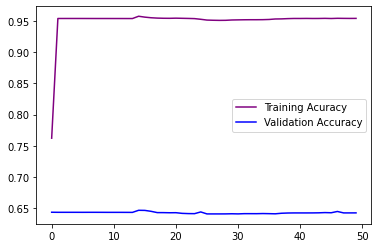

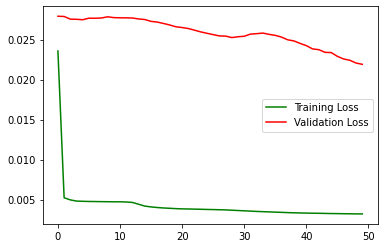

In [41]:


drive.mount('/content/drive')


cp = callbacks.ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/kddresults/", verbose=1, save_weights_only=True, monitor='val_acc',mode='max')
history = model.fit(X_train,y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[cp])
model.save_weights('/content/drive/My Drive/Colab Notebooks/weights.h5')
#model_architecture = model.to_json()

import matplotlib.pylab as plt

print(history.history)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(acc,color = 'purple',label = 'Training Acuracy')
plt.plot(val_acc,color = 'blue',label = 'Validation Accuracy')
plt.legend()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.legend()




In [42]:
#model.load_weights('/content/drive/My Drive/Colab Notebooks/weights.h5')
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model = create_model()
model.load_weights("/content/drive/My Drive/Colab Notebooks/kddresults/")


test_loss, test_acc = model.evaluate(x_test, y_test)
print('Accuracy:', test_acc)


910/910 [==============================] - 1s 1ms/step - loss: 0.0172 - accuracy: 0.9509
Accuracy: 0.9509238004684448
